# Time series prediction using LSTM

## Dataset
- Daily minimum temperatures in Melbourne, Australia, 1981-1990
- Units: Degrees Celcius

## Question 1

### Load the data
- load daily-minimum-temperatures-in-me.csv

In [1]:
# if you are using google colab
from google.colab import files
files.upload()

Saving daily-minimum-temperatures-in-me.csv to daily-minimum-temperatures-in-me.csv


{'daily-minimum-temperatures-in-me.csv': b'Date,Temperature\n1981-01-01,20.7\n1981-01-02,17.9\n1981-01-03,18.8\n1981-01-04,14.6\n1981-01-05,15.8\n1981-01-06,15.8\n1981-01-07,15.8\n1981-01-08,17.4\n1981-01-09,21.8\n1981-01-10,20\n1981-01-11,16.2\n1981-01-12,13.3\n1981-01-13,16.7\n1981-01-14,21.5\n1981-01-15,25\n1981-01-16,20.7\n1981-01-17,20.6\n1981-01-18,24.8\n1981-01-19,17.7\n1981-01-20,15.5\n1981-01-21,18.2\n1981-01-22,12.1\n1981-01-23,14.4\n1981-01-24,16\n1981-01-25,16.5\n1981-01-26,18.7\n1981-01-27,19.4\n1981-01-28,17.2\n1981-01-29,15.5\n1981-01-30,15.1\n1981-01-31,15.4\n1981-02-01,15.3\n1981-02-02,18.8\n1981-02-03,21.9\n1981-02-04,19.9\n1981-02-05,16.6\n1981-02-06,16.8\n1981-02-07,14.6\n1981-02-08,17.1\n1981-02-09,25\n1981-02-10,15\n1981-02-11,13.7\n1981-02-12,13.9\n1981-02-13,18.3\n1981-02-14,22\n1981-02-15,22.1\n1981-02-16,21.2\n1981-02-17,18.4\n1981-02-18,16.6\n1981-02-19,16.1\n1981-02-20,15.7\n1981-02-21,16.6\n1981-02-22,16.5\n1981-02-23,14.4\n1981-02-24,14.4\n1981-02-25,18.5\

In [0]:
import pandas as pd
df1 = pd.read_csv("daily-minimum-temperatures-in-me.csv")

### Print the data
- First 5 rows only

In [4]:
df1.head()

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


### Set index column
- Set the DataFrame index using "Date" column

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
Date           3650 non-null object
Temperature    3650 non-null float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [0]:
df1['Date'] = pd.to_datetime(df1['Date']) #Chaning the date format from object

In [7]:
df1['Date']

0      1981-01-01
1      1981-01-02
2      1981-01-03
3      1981-01-04
4      1981-01-05
          ...    
3645   1990-12-27
3646   1990-12-28
3647   1990-12-29
3648   1990-12-30
3649   1990-12-31
Name: Date, Length: 3650, dtype: datetime64[ns]

In [16]:
df1.dtypes #date column we have made as index, hence its not showing here, refer below cell

Temperature    float64
dtype: object

In [0]:
df1.set_index('Date', inplace=True)

In [10]:
df1.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [0]:
df1 = df1.sort_index()

In [13]:
df1.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


## Question 2

### Check the total count of null values in the data

In [14]:
df1.isnull().sum()

Temperature    0
dtype: int64

### Drop all the rows with null values
- use dropna() method

In [0]:
df1 = df1.dropna(how = 'any') #we dont have any null values

In [19]:
df1.head() #since date has become index, its showing below the temparature column

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


## Question 3

### Describe your dataframe
- use describe() method

In [20]:
df1.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


### Plot the dataframe
- use plot() method

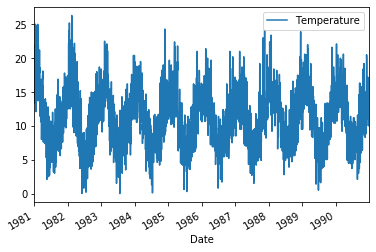

In [21]:
df1.plot() #Dave in x axis and temp in y axis

### Get representation of the distribution of data using histogram
- use hist() method

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc33f02a90>]],
      dtype=object)

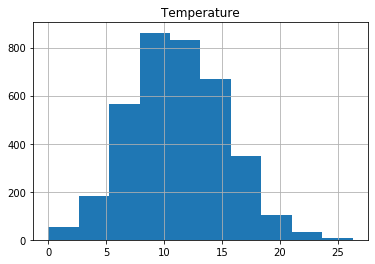

In [22]:
df1.hist()

### Check minimum and maximum temperature
- use min() and max() methods

In [23]:
df1.min() #displaying the min temp

Temperature    0.0
dtype: float64

In [24]:
df1.max() #displaying the max temp

Temperature    26.3
dtype: float64

## Question 4

### Split the dataset into training and testing
- training data: 75%
- testing data: 25%

In [0]:
df1 = df1.reset_index(drop = True)

In [26]:
df1.head() #ur index column is dropped, progressing only with date column

,Temperature
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8


In [28]:
len(df1)

3650

In [29]:
len(df1)* 0.75 #taking out 75% of records for training

2737.5

In [30]:
int(len(df1)* 0.75) #rounding off

2737

In [0]:
test = df1[int(len(df1) * 0.25):]

In [35]:
int(len(df1) * 0.25)

912

In [0]:
train = df1[:int(len(df1) * 0.75)] #taking from 0 - 2737 records - 75% of records comes here
test1 = df1[int(len(df1) * 0.75):] #taking from 2737 - remaings records - remaining 25% comes here becus of the : position

In [38]:
len(train)

2737

In [39]:
len(test1)

913

### Normalize the data
- normalize temperature values using MinMaxScaler
- feature_range: 0-1
- fit MinMaxScaler on train data and transform it
  - use fit_transform() method
- transform test data using MinMaxScaler object
  - use transform() method

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test1)

### Print scaled train and test data
- print only first 5 values

In [41]:
scaled_train[:5]

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       [0.55513308],
       [0.60076046]])

In [42]:
scaled_test[:5]

array([[0.22813688],
       [0.22053232],
       [0.18631179],
       [0.19011407],
       [0.31939163]])

## Question 5

### Create sequential data
Map the temperature at a particular day 'd' to the temperature at day t
'd+n', where n is any number you define.

For example: to map temperatures of consecutive days, use d+1, i.e. lookback = 1
- Below function takes data as input and returns sequential data.
- X as features and y as labels

In [0]:
import numpy as np
def create_seq_data(data, lookback=1):
  X, y = list(), list()
  
  for day in range((len(data)-lookback)):
    X.append(data[day: day+lookback, 0])
    y.append(data[day+lookback, 0])
  return np.array(X), np.array(y)

### Use the above function to create train and test sets
- Get X_train and y_train
- Get X_test and y_test
- lookback = 1

In [0]:
look_back = 1
X_train, y_train = create_seq_data(scaled_train, look_back)
X_test, y_test = create_seq_data(scaled_test, look_back)

### Reshape the data
- Reshape X_train and X_test
- use np.reshape() method
- this is to be done to make the data ready for input in model

In [45]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(2736, 1, 1)
(912, 1, 1)


### Print shape of data
- print shape of X_train and X_test

In [46]:
print(X_train.shape)
print(X_test.shape)

(2736, 1, 1)
(912, 1, 1)


## Question 6

### Define sequential model
- initialize a Sequential model
- add an LSTM layer
  - units: 10
  - stateful: True
  - pass a `batch_input_shape` argument to your layer
  - batch_input_shape: (batch_size, look_back, 1)
    - batch_size: 1
    - look_back: 1
- add Dense layer with 1 neuron

In [47]:
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np
batch_size = 1
model = Sequential()
model.add(LSTM(10, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))

Using TensorFlow backend.


## Question 7

### compile your model
- loss: mean_squared_error
- optimizer: adam

In [48]:
model.compile(loss='mean_squared_error', optimizer='adam') #using mse as it is a regression problem

### summarize your model
- use summary() method

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 10)                   480       
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


## Question 8

### fit your model
- epochs: 50
- batch_size: 1

In [50]:
model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=2, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





 - 5s - loss: 0.0219
Epoch 2/50
 - 4s - loss: 0.0132
Epoch 3/50
 - 4s - loss: 0.0111
Epoch 4/50
 - 4s - loss: 0.0107
Epoch 5/50
 - 4s - loss: 0.0106
Epoch 6/50
 - 4s - loss: 0.0106
Epoch 7/50
 - 4s - loss: 0.0106
Epoch 8/50
 - 4s - loss: 0.0105
Epoch 9/50
 - 4s - loss: 0.0105
Epoch 10/50
 - 5s - loss: 0.0105
Epoch 11/50
 - 5s - loss: 0.0103
Epoch 12/50
 - 4s - loss: 0.0104
Epoch 13/50
 - 4s - loss: 0.0104
Epoch 14/50
 - 4s - loss: 0.0103
Epoch 15/50
 - 4s - loss: 0.0105
Epoch 16/50
 - 4s - loss: 0.0104
Epoch 17/50
 - 4s - loss: 0.0103
Epoch 18/50
 - 4s - loss: 0.0102
Epoch 19/50
 - 4s - loss: 0.0102
Epoch 20/50
 - 4s - loss: 0.0102
Epoch 21/50
 - 4s - loss: 0.0102
Epoch 22/50
 - 5s - loss: 0.0103
Epoch 23/50
 - 4s - loss: 0.0101
Epoch 24/50
 - 4s - loss: 0.0102
Epoch 25/50
 - 4s - loss: 0.0101
Epoch 26/50
 - 4s - loss: 0.0101
Epoch 27/50
 - 4s - loss: 0.0099
Epoch 28/50
 - 4

## Question 9

### make predictions on train data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [0]:
trainPredict = model.predict(X_train, batch_size=1)

### reset model state
- if you are using stateful=True in your model then you should call reset_states every time, when you want to make consecutive model calls independent.
- use reset_states() method

In [0]:
model.reset_states()

### make predictions on test data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [0]:
testPredict = model.predict(X_test, batch_size=1)

## Question 10

### Inverse train predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [0]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train]) #why we are giving here as an array

### Inverse test predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [0]:
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

### Evaluate train predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print training RMSE

In [0]:
import math
from sklearn.metrics import mean_squared_error

In [57]:
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 2.59 RMSE


### Evaluate test predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print testing RMSE

In [58]:
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 2.52 RMSE
